In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import math as m
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
import numpy as np

In [15]:
CabData = pd.read_csv('Cab_Data.csv')
CityData = pd.read_csv('City.csv')
CustomerData = pd.read_csv('Customer_ID.csv')
TransactionData = pd.read_csv('Transaction_ID.csv')

In [16]:
MasterData = (TransactionData.merge(CabData, how= 'inner')).merge(CustomerData, how='inner')
MasterData = MasterData.merge(CityData, how= 'inner')
MasterData #all the data merged into one, there were no NA values and no duplicated rows


,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,"814,885","24,701"
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,"814,885","24,701"
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,"814,885","24,701"
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,"814,885","24,701"
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,51406,Cash,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,Female,29,6829,"418,859","127,001"
359388,10319775,51406,Cash,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,Female,29,6829,"418,859","127,001"
359389,10347676,51406,Card,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,Female,29,6829,"418,859","127,001"
359390,10358624,51406,Cash,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,Female,29,6829,"418,859","127,001"


In [126]:

#converting dates analysis
FormattedDates = pd.read_csv('dates.csv')
MasterData['Year'] = pd.Series([int(i[-4:]) for i in FormattedDates['Date of Travel']])
#CompanyData
CompanyData=MasterData.set_index("Company")
CompanyData['Profit'] = CompanyData['Price Charged']-CompanyData['Cost of Trip']
CompanyData
#PinkCab
Pink_Cab_Data = CompanyData.loc['Pink Cab', 'Customer ID':'Profit']
PinkYearly = []
#2016
Pink16 = Pink_Cab_Data.set_index('Year').loc[2016]
Pink16
#2017
Pink17 = Pink_Cab_Data.set_index('Year').loc[2017]
#2018
Pink18 = Pink_Cab_Data.set_index('Year').loc[2018]
PinkYearly.extend([Pink16, Pink17, Pink18])

#YellowCab
Yellow_Cab_Data = CompanyData.loc['Yellow Cab', 'Customer ID':'Profit']
YellowYearly = []
#2016
Yellow16 = Yellow_Cab_Data.set_index('Year').loc[2016]
#2017
Yellow17 = Yellow_Cab_Data.set_index('Year').loc[2017]
#2018
Yellow18 = Yellow_Cab_Data.set_index('Year').loc[2018]
YellowYearly.extend([Yellow16, Yellow17, Yellow18])



,Transaction ID,Customer ID,Payment_Mode,Date of Travel,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users,Year,Profit
Company,,,,,,,,,,,,,,,
Pink Cab,10000011,29290,Card,42377,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,"814,885","24,701",2016,57.3150
Yellow Cab,10351127,29290,Cash,43302,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,"814,885","24,701",2018,281.2772
Yellow Cab,10412921,29290,Card,43427,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,"814,885","24,701",2018,194.6480
Pink Cab,10000012,27703,Card,42375,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,"814,885","24,701",2016,23.6660
Yellow Cab,10320494,27703,Card,43211,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,"814,885","24,701",2018,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellow Cab,10307228,51406,Cash,43162,WASHINGTON DC,38.40,668.93,525.3120,Female,29,6829,"418,859","127,001",2018,143.6180
Yellow Cab,10319775,51406,Cash,43203,WASHINGTON DC,3.57,67.60,44.5536,Female,29,6829,"418,859","127,001",2018,23.0464
Yellow Cab,10347676,51406,Card,43287,WASHINGTON DC,23.46,331.97,337.8240,Female,29,6829,"418,859","127,001",2018,-5.8540


,Customer ID,Payment_Mode,Date of Travel,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users,Profit
Year,,,,,,,,,,,,,
2016,29290,Card,42377,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,"814,885","24,701",57.315
2016,27703,Card,42375,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,"814,885","24,701",23.666
2016,28712,Cash,42371,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,"814,885","24,701",27.568
2016,28020,Cash,42376,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,"814,885","24,701",25.798
2016,28020,Cash,42670,ATLANTA GA,41.44,522.14,484.848,Male,23,23327,"814,885","24,701",37.292
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,52160,Card,42729,WASHINGTON DC,5.95,87.34,59.500,Male,53,20986,"418,859","127,001",27.840
2016,51675,Card,42709,WASHINGTON DC,46.80,721.19,524.160,Female,31,7727,"418,859","127,001",197.030
2016,52360,Card,42713,WASHINGTON DC,8.33,120.34,84.133,Male,48,12992,"418,859","127,001",36.207


Average Profit

Pink Cab
Mean: 62.65217410961977
Median: 41.5

Yellow Cab
Mean: 160.25998584103021
Median: 101.99999999999997


Average Profit/KM

Pink Cab
Mean: 2.769907700396534
Median: 2.4235981308411207

Yellow Cab
Mean: 7.105507808353114
Median: 5.601622807017544


2016 Pink Cab Profit
Mean: 68.32181913875598
Median: 46.09200000000002

2016 Yellow Cab Profit
Mean: 169.34782076143924
Median: 109.6368


2017 Pink Cab Profit
Mean: 67.0708389564988
Median: 44.18000000000001

2017 Yellow Cab Profit
Mean: 168.81705657456536
Median: 110.43400000000003


2018 Pink Cab Profit
Mean: 53.2296891504606
Median: 35.93899999999999

2018 Yellow Cab Profit
Mean: 143.41612225817744
Median: 87.9452


Average Profit Per Person

Pink Cab: 214.8628930407676
Yellow Cab: 346.6143823339975
ATLANTA GA Averages

Pink Cab
Mean: 54.51196140749149
Median: 38.620999999999995
Yellow Cab
Mean: 128.79772314063848
Median: 100.41199999999998


SAN DIEGO CA Averages

Pink Cab
Mean: 59.77227970389805
Median: 43.1999999

1713511.224000004

2033654.9079999968

1560162.1889999944

13926995.431599945

16575977.968000099

13517399.771199875

3.040784063208716

2.9652743726257738

2.3576667235067004

7.4877196715116305

7.483920258543084

6.362445986092584

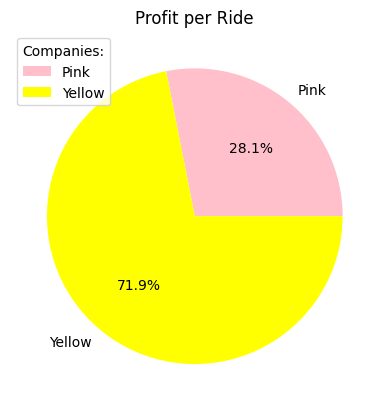

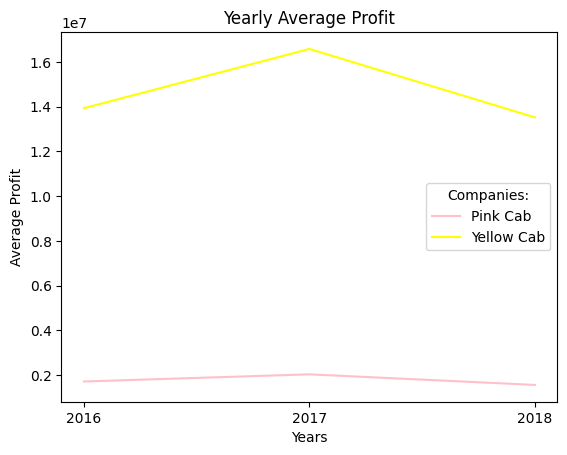

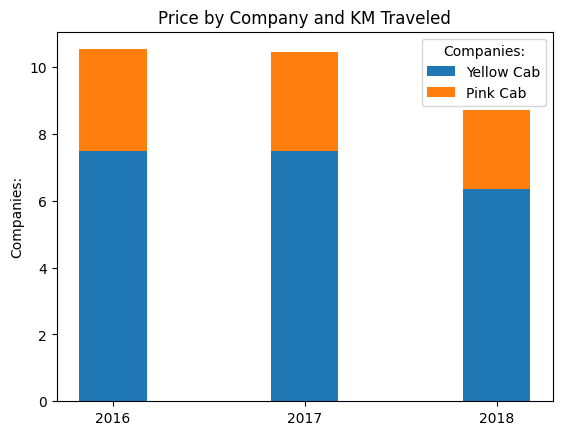

In [264]:
#Profit Analysis

#Average Profit for each Company
print('Average Profit\n')
print(f"Pink Cab\nMean: {Pink_Cab_Data['Profit'].mean()}\nMedian: {Pink_Cab_Data['Profit'].median()}\n")
print(f"Yellow Cab\nMean: {Yellow_Cab_Data['Profit'].mean()}\nMedian: {Yellow_Cab_Data['Profit'].median()}\n\n")

#Average Profit per Kilometer for each Company
print('Average Profit/KM\n')
Pink_Cab_Data['Profit/KM'] = Pink_Cab_Data['Profit']/Pink_Cab_Data['KM Travelled']
Yellow_Cab_Data['Profit/KM'] = Yellow_Cab_Data['Profit']/Yellow_Cab_Data['KM Travelled']
print(f"Pink Cab\nMean: {Pink_Cab_Data['Profit/KM'].mean()}\nMedian: {Pink_Cab_Data['Profit/KM'].median()}\n")
print(f"Yellow Cab\nMean: {Yellow_Cab_Data['Profit/KM'].mean()}\nMedian: {Yellow_Cab_Data['Profit/KM'].median()}\n\n")

#Average Profit Per Year for each Company
for i in range(len(PinkYearly)):
    print(f"{i+2016} Pink Cab Profit\nMean: {PinkYearly[i]['Profit'].mean()}\nMedian: {PinkYearly[i]['Profit'].median()}\n")
    print(f"{i+2016} Yellow Cab Profit\nMean: {YellowYearly[i]['Profit'].mean()}\nMedian: {YellowYearly[i]['Profit'].median()}\n\n")

#Average Profit Per Person for each Company
print('Average Profit Per Person\n')

print(f"Pink Cab: {Pink_Cab_Data['Profit'].sum()/24701}")
print(f"Yellow Cab: {Yellow_Cab_Data['Profit'].sum()/127001}")

#Average Profit per City for each Company
Cities = set()
for i in CompanyData['City']:
    if i not in Cities:
        Cities.add(i)


PinkCities = Pink_Cab_Data.set_index('City')
YellowCities = Yellow_Cab_Data.set_index('City')
for i in Cities:
    print(f"{i} Averages\n\nPink Cab\nMean: {PinkCities.loc[i]['Profit'].mean()}\nMedian: {PinkCities.loc[i]['Profit'].median()}\nYellow Cab\nMean: {YellowCities.loc[i]['Profit'].mean()}\nMedian: {YellowCities.loc[i]['Profit'].median()}\n\n")

sum(Pink16['Profit'])
sum(Pink17['Profit'])
sum(Pink18['Profit'])
sum(Yellow16['Profit'])
sum(Yellow17['Profit'])
sum(Yellow18['Profit'])

sum(Pink16['Profit'])/sum(Pink16["KM Travelled"])
sum(Pink17['Profit'])/sum(Pink17["KM Travelled"])
sum(Pink18['Profit'])/sum(Pink18["KM Travelled"])
sum(Yellow16['Profit'])/sum(Yellow16["KM Travelled"])
sum(Yellow17['Profit'])/sum(Yellow17["KM Travelled"])
sum(Yellow18['Profit'])/sum(Yellow18["KM Travelled"])


#Vizualizations

#Average profit/ride
y = np.array([62.65, 160.26])
mylabels = ["Pink", "Yellow"]
c = ['Pink','Yellow']
plot =plt.title("Profit per Ride")
plot =plt.pie(y, labels = mylabels, colors = c, autopct='%1.1f%%')
plot =plt.legend()
plot =plt.legend(title = "Companies:")
plt.show()

#Yearly 
x = plt.subplot()
plot =x.set_xticks(np.arange(len([2016, 2017, 2018])),[2016, 2017, 2018])
y1 = np.array([1713511, 2033655, 1560162])
#x2 = np.array([2016, 2017, 2018])
y2 = np.array([13926995, 16575977, 13517400])
plot =plt.title("Yearly Average Profit")
plot =plt.xlabel("Years")
plot =plt.ylabel("Average Profit")
plot =x.plot(y1, label='Pink Cab', color='pink')
plot =x.plot(y2, label='Yellow Cab', color='yellow')
plot =plt.legend()
plot =plt.legend(title = "Companies:")

#yearly profit/kilo
labels = ['2016', '2017', '2018']
yellow_means = [7.49, 7.48, 6.36]
pink_means = [3.04, 2.97, 2.36]
width = 0.35       
fig, ax = plt.subplots()
plot =ax.bar(labels, yellow_means, width, label='Yellow Cab')
plot =ax.bar(labels, pink_means, width, bottom = yellow_means, label='Pink Cab')
plot =ax.set_ylabel('Companies:')
plot =ax.set_title('Price by Company and KM Traveled')
plot =ax.legend()
plot =plt.legend(title = "Companies:")
plt.show()

0.6853387825528561

Percent Profit Composed of Young Users
Pink:

2016: 13.62%
2017: 16.33%
2018: 12.38%
Total: 42.33%

Yellow:

2016: 13.16%
2017: 15.69%
2018: 12.71%
Total: 41.56%

Percent Profit Composed of Early Middle Age Users
Pink:

2016: 11.62%
2017: 13.92%
2018: 10.93%
Total: 36.47%

Yellow:

2016: 11.86%
2017: 13.98%
2018: 11.47%
Total: 37.31%

Percent Profit Composed of Late Middle Age Users
Pink:

2016: 4.86%
2017: 5.70%
2018: 4.30%
Total: 14.86%

Yellow:

2016: 4.72%
2017: 5.67%
2018: 4.65%
Total: 15.05%

Percent Profit Composed of Elderly Users
Pink:

2016: 2.18%
2017: 2.37%
2018: 1.79%
Total: 6.34%

Yellow:

2016: 1.90%
2017: 2.31%
2018: 1.88%
Total: 6.09%



114479

93260

41251

14325

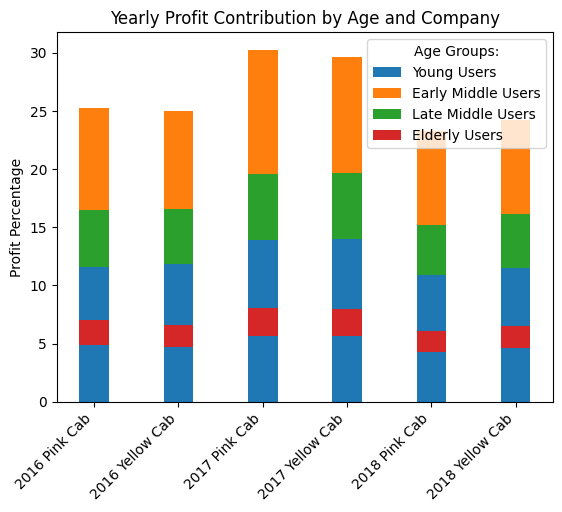

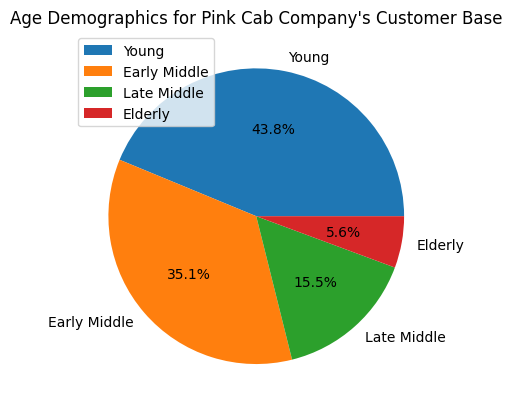

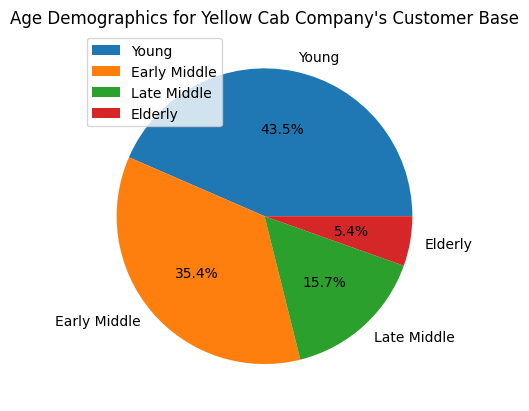

In [258]:
#Age Analysis
#Hypothesis 1: For both companies, most of their customers and therefore profit contribution comes from younger people.
MasterData['Age'].skew() #age is skewed right so there are more people from the younger range using these services in general
freq = {}
for i in MasterData['Age']:
    if i not in freq:
        freq.update({i:1})
    else:
        freq[i]+=1
#plt.plot(freq.keys(), freq.values(), 'o')
#Definine the age range: <30, 31-45, 46-60, 60+
Young = lambda x : x<=30
Middle1 = lambda x : 30<x<=45
Middle2 = lambda x : 45<x<60

AgegrpsP =  {'Young':{2016:[], 2017:[], 2018:[]}, 'Early Middle Age':{2016:[], 2017:[], 2018:[]}, 'Late Middle Age':{2016:[], 2017:[], 2018:[]}, 'Elderly':{2016:[], 2017:[], 2018:[]}}
AgegrpsY = {'Young':{2016:[], 2017:[], 2018:[]}, 'Early Middle Age':{2016:[], 2017:[], 2018:[]}, 'Late Middle Age':{2016:[], 2017:[], 2018:[]}, 'Elderly':{2016:[], 2017:[], 2018:[]}}
k=0
for year in PinkYearly:
    count = 0

    for i in year['Age']:
        if Young(i):
            AgegrpsP['Young'][2016+k].append(year['Profit'].iloc[count])
        elif Middle1(i):
            AgegrpsP['Early Middle Age'][2016+k].append(year['Profit'].iloc[count])
        elif Middle2(i):
            AgegrpsP['Late Middle Age'][2016+k].append(year['Profit'].iloc[count])
        else:
            AgegrpsP['Elderly'][2016+k].append(year['Profit'].iloc[count])
        count+=1
    k+=1

k=0
for year in YellowYearly:
    count = 0
    for i in year['Age']:
        if Young(i):
            AgegrpsY['Young'][2016+k].append(year['Profit'].iloc[count])
        elif Middle1(i):
            AgegrpsY['Early Middle Age'][2016+k].append(year['Profit'].iloc[count])
        elif Middle2(i):
            AgegrpsY['Late Middle Age'][2016+k].append(year['Profit'].iloc[count])
        else:
            AgegrpsY['Elderly'][2016+k].append(year['Profit'].iloc[count])
        count+=1
    k+=1

for i in AgegrpsP:
    Sum=0
    print(f"Percent Profit Composed of {i} Users\nPink:\n")
    for j in AgegrpsP[i]:
        Sum+=sum(AgegrpsP[i][j])
        print(f"{j}: {sum(AgegrpsP[i][j])/Pink_Cab_Data['Profit'].sum():.2%}")
    print(f"Total: {Sum/Pink_Cab_Data['Profit'].sum():.2%}")
    Sum=0
    print('\nYellow:\n')
    for k in AgegrpsY[i]:
        Sum+=sum(AgegrpsY[i][k])
        print(f"{k}: {sum(AgegrpsY[i][k])/Yellow_Cab_Data['Profit'].sum():.2%}")
    print(f"Total: {Sum/Yellow_Cab_Data['Profit'].sum():.2%}\n")

youngCount = 0
earlyCount = 0
LateCount = 0
ElderlyCount = 0
for x in Yellow_Cab_Data['Age']:
    if x <= 30:
        youngCount = youngCount + 1
    if 31 < x <= 45:
        earlyCount = earlyCount + 1
    if 46 < x <= 60:
        LateCount = LateCount + 1
    if x > 60:
        ElderlyCount = ElderlyCount + 1

youngCount 
earlyCount 
LateCount 
ElderlyCount

#Vizaulization
#Profit Contribution
labels = ['2016 Pink Cab', '2016 Yellow Cab', '2017 Pink Cab', '2017 Yellow Cab', '2018 Pink Cab', '2018 Yellow Cab']
Young_means = [13.62, 13.16, 16.33, 15.69, 12.38, 12.71]
Early_means = [11.62, 11.86, 13.92, 13.98, 10.93, 11.47]
Late_means = [4.86, 4.72, 5.70, 5.67, 4.30, 4.65]
Elderly_means = [2.18, 1.90, 2.37, 2.31, 1.79, 1.88]
width = 0.35     

fig, ax = plt.subplots()

plot = ax.bar(labels, Young_means, width, label = 'Young Users')
plot = ax.bar(labels, Early_means, width, bottom = Young_means, label = 'Early Middle Users')
plot = ax.bar(labels, Late_means, width, bottom = Early_means, label = 'Late Middle Users')
plot = ax.bar(labels, Elderly_means, width, bottom = Late_means, label = 'Elderly Users')

plot = ax.set_ylabel('Profit Percentage')
plot = ax.set_title('Yearly Profit Contribution by Age and Company')
plot = ax.legend()
plot =plt.legend(title = "Age Groups:")
plot =plt.xticks(rotation=45, ha='right')
plt.show()

#Customer Base
y = np.array([35553, 28534, 12556, 4586])
mylabels = ["Young", "Early Middle", "Late Middle", "Elderly"]
plot =plt.title("Age Demographics for Pink Cab Company's Customer Base")
plot =plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plot =plt.legend()
plot =plt.legend(title = "Ages:")
plt.legend(loc='upper left')
plt.show() 

y = np.array([114479, 93260, 41251, 14325])
mylabels = ["Young", "Early Middle", "Late Middle", "Elderly"]
plot =plt.title("Age Demographics for Yellow Cab Company's Customer Base")
plot =plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plot =plt.legend()
plot =plt.legend(title = "Ages:")
plt.legend(loc='upper left')
plt.show() 



33082

26889

20802

3938

0.3095622398389115

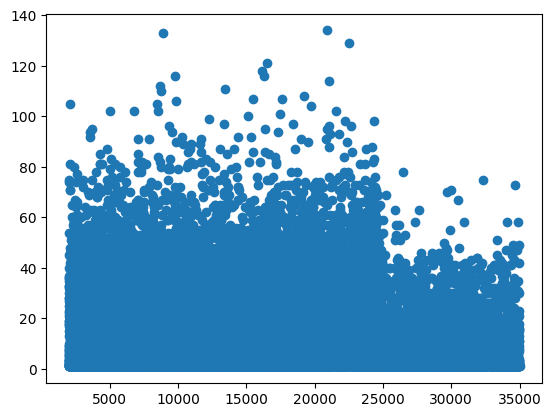

,Customer ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),Year,Profit,Profit/KM
count,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000
mean,18422.581577,42975.183435,22.559917,310.800856,248.148682,35.322414,15059.047137,2017.049934,62.652174,2.769908
std,18084.830799,305.502235,12.231092,181.995661,135.403345,12.644780,7991.077762,0.799737,77.590378,2.697212
min,1.000000,42371.000000,1.900000,15.600000,19.000000,18.000000,2000.000000,2016.000000,-220.060000,-4.912054
25%,5317.500000,42700.000000,12.000000,159.970000,131.868000,25.000000,8371.000000,2016.000000,11.206000,0.891572
50%,8876.000000,43000.000000,22.440000,298.060000,246.330000,33.000000,14713.000000,2017.000000,41.500000,2.423598
75%,27190.000000,43252.000000,32.960000,441.505000,360.180000,42.000000,21055.000000,2018.000000,93.965000,4.281847
max,60000.000000,43465.000000,48.000000,1623.480000,576.000000,65.000000,35000.000000,2018.000000,1119.480000,28.646939


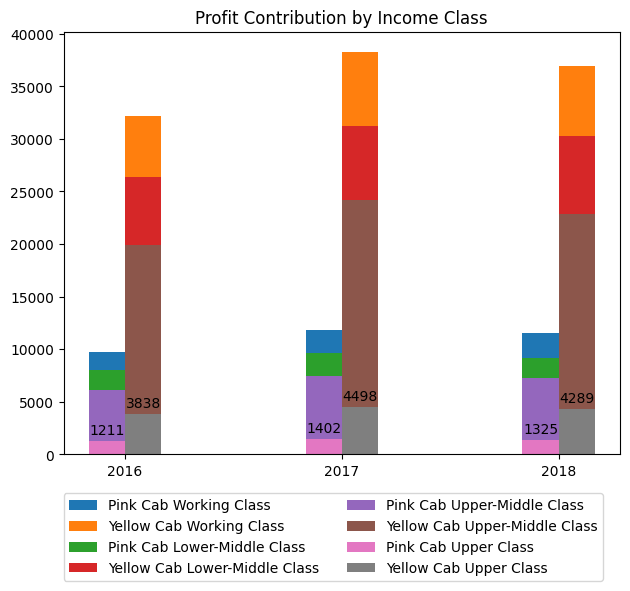

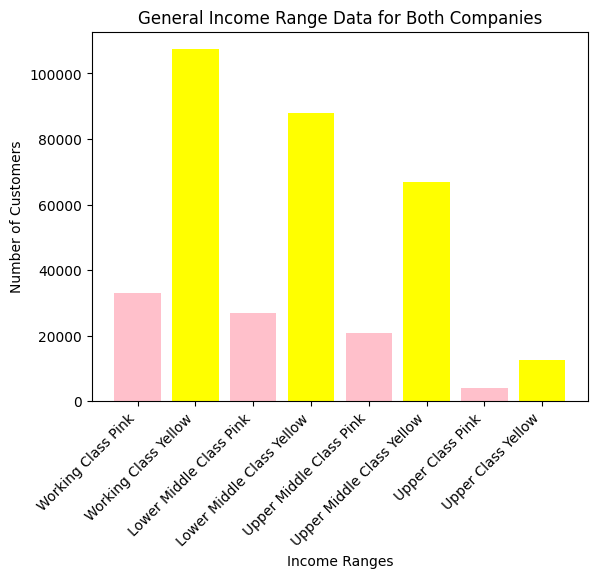

In [262]:
#Income Analysis
#Hypothesis 2: For both of the companies, most of the customer base and therefore profit contribution will be made from the lower class.
#Explanation: Presumption that it will be lower income categories who use transportation services for work.

#Evaluations
WorkingCount = 0
LowerMCount = 0
UpperMCount = 0
UpperCount = 0
for x in Pink_Cab_Data['Income (USD/Month)']:
    if x < 12000:
        WorkingCount = WorkingCount + 1
    if 12000 <= x < 20000:
        LowerMCount = LowerMCount + 1
    if 20000 <= x < 30000:
        UpperMCount = UpperMCount + 1
    if x >= 30000:
        UpperCount = UpperCount + 1

WorkingCount 
LowerMCount 
UpperMCount 
UpperCount 

#Vizualizations
MasterData['Income (USD/Month)'].skew() #Income is skewed right
freq2 = {}
b = 1.001
for i in MasterData['Income (USD/Month)']:
    #i = m.floor(m.log(i, b))+1
    if i not in freq2:
        freq2.update({i:1})
    else:
        freq2[i]+=1


plot =plt.plot(freq2.keys(), freq2.values(), 'o')
plt.show()
Pink_Cab_Data.describe() #Range of income ($/month) is from $2k-35k 
#Income categories are not accurately associated with realized income ranges currently found in America (proportioned for the dataset)
#Therefore exercise caution when applying the results/hypothesis to real-world applicatons
LowI = lambda x : x<12000
MiddleI1 = lambda x : 12000<=x<20000
MiddleI2 = lambda x : 20000<=x<30000
#General Consumer Income for both companies
IncgrpsP = {'Working Class':{2016:[], 2017:[], 2018:[]}, 'Lower-Middle Class':{2016:[], 2017:[], 2018:[]}, 'Upper-Middle Class':{2016:[], 2017:[], 2018:[]}, 'Upper Class':{2016:[], 2017:[], 2018:[]}}
IncgrpsY = {'Working Class':{2016:[], 2017:[], 2018:[]}, 'Lower-Middle Class':{2016:[], 2017:[], 2018:[]}, 'Upper-Middle Class':{2016:[], 2017:[], 2018:[]}, 'Upper Class':{2016:[], 2017:[], 2018:[]}}

k=0
for year in PinkYearly:
    count = 0

    for i in year['Income (USD/Month)']:
        if LowI(i):
            IncgrpsP['Working Class'][2016+k].append(year['Profit'].iloc[count])
        elif MiddleI1(i):
            IncgrpsP['Lower-Middle Class'][2016+k].append(year['Profit'].iloc[count])
        elif MiddleI2(i):
            IncgrpsP['Upper-Middle Class'][2016+k].append(year['Profit'].iloc[count])
        else:
            IncgrpsP['Upper Class'][2016+k].append(year['Profit'].iloc[count])
        count+=1
    k+=1

k=0
for year in YellowYearly:
    count = 0

    for i in year['Income (USD/Month)']:
        if LowI(i):
            IncgrpsY['Working Class'][2016+k].append(year['Profit'].iloc[count])
        elif MiddleI1(i):
            IncgrpsY['Lower-Middle Class'][2016+k].append(year['Profit'].iloc[count])
        elif MiddleI2(i):
            IncgrpsY['Upper-Middle Class'][2016+k].append(year['Profit'].iloc[count])
        else:
            IncgrpsY['Upper Class'][2016+k].append(year['Profit'].iloc[count])
        count+=1
    k+=1

figure, axis = plt.subplots()


years = [2016,2017,2018]
for i in IncgrpsP:
    P= axis.bar(np.arange(len(years))-(1/12),[len(IncgrpsP[i][j]) for j in IncgrpsP[i]], width=1/6, label='Pink Cab ' + i)
    Y= axis.bar(np.arange(len(years))+(1/12),[len(IncgrpsY[i][j]) for j in IncgrpsY[i]], width=1/6, label='Yellow Cab ' + i)

plot =axis.set_xticks(np.arange(len(years)), years)
plot =axis.bar_label(P, padding=3)
plot =axis.bar_label(Y, padding=3)


plot =figure.tight_layout()
plot =plt.title("Profit Contribution by Income Class")
plot =plt.legend(loc=(0, -.3), ncols=2)
plt.show()

x = ["Working Class Pink", "Working Class Yellow", "Lower Middle Class Pink", "Lower Middle Class Yellow", "Upper Middle Class Pink", "Upper Middle Class Yellow", "Upper Class Pink", "Upper Class Yellow" ]
y = [33082, 107374, 26889, 87799, 20802, 66883, 3938, 12625]
c = ['pink', 'yellow', 'pink', 'yellow', 'pink', 'yellow','pink', 'yellow']
plot =plt.bar(x, y, color=c)
plot =plt.title("General Income Range Data for Both Companies")
plot =plt.xlabel("Income Ranges")
plot =plt.ylabel("Number of Customers")
plot =plt.xticks(rotation=45, ha='right')
plt.show()

#It appears that working class does make most of the cusomter base for both customers
#But upper Middle class contributes the most profit for both companies.

47231
158681


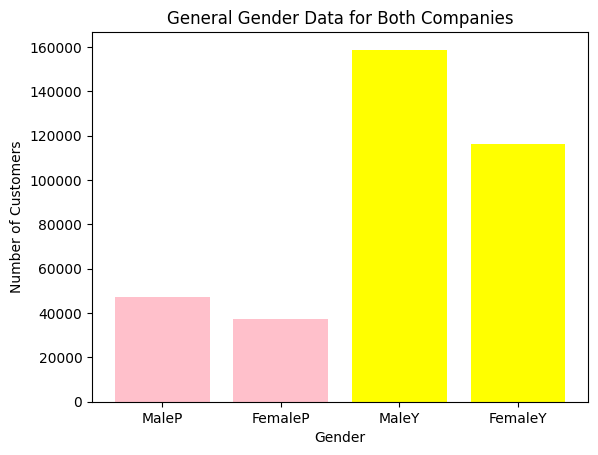

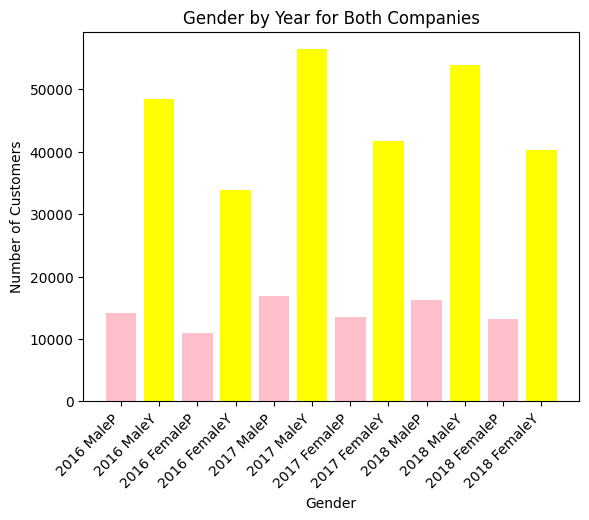

14207
48378
16846
56404
16178
53899


In [249]:
#Gender Analysis
#Hypothesis 3: For both companies, males make up most of the customer base and therefore contribute more to profit than females.
#Explanation: Background knowledge that the taxi industry is male dominated. 

#Customer base for each company
Pink_Gender = Pink_Cab_Data['Gender']
counts=pd.Series(Pink_Gender).value_counts()
print(counts.get('Male')) # 84,711 customers total 47,231 males and 37,480 are females
Yellow_Gender = Yellow_Cab_Data['Gender']
counts=pd.Series(Yellow_Gender).value_counts() #
print(counts.get('Male')) # 274,681 customers total 158,681 are male and 116,000 are females

#Vizualization
x = ["MaleP", "FemaleP", "MaleY", "FemaleY"]
y = [47231, 37480, 158681, 116000]
c = ['pink','pink','yellow','yellow']
plot =plt.bar(x, y, color=c)
plot =plt.title("General Gender Data for Both Companies")
plot =plt.xlabel("Gender")
plot =plt.ylabel("Number of Customers")
plt.show()

x = ["2016 MaleP", "2016 MaleY", "2016 FemaleP", "2016 FemaleY", "2017 MaleP", "2017 MaleY", "2017 FemaleP", "2017 FemaleY", "2018 MaleP", "2018 MaleY", "2018 FemaleP", "2018 FemaleY"]
y = [14207, 48378, 10873, 33861, 16846, 56404, 13475, 41785, 16178, 53899, 13132, 40354]
c = ['pink','yellow','pink','yellow','pink','yellow','pink','yellow','pink','yellow','pink','yellow']
plot =plt.bar(x, y, color=c)
plot =plt.title("Gender by Year for Both Companies")
plot =plt.xlabel("Gender")
plot =plt.ylabel("Number of Customers")
plot =plt.xticks(rotation=45, ha='right')
plt.show()

#Calculations
Pink_Gender2016 = Pink16['Gender']
counts=pd.Series(Pink_Gender2016).value_counts()
print(counts.get('Male'))
Yellow_Gender2016 = Yellow16['Gender']
counts=pd.Series(Yellow_Gender2016).value_counts()
print(counts.get('Male'))

Pink_Gender2017 = Pink17['Gender']
counts=pd.Series(Pink_Gender2017).value_counts()
print(counts.get('Male'))
Yellow_Gender2017 = Yellow17['Gender']
counts=pd.Series(Yellow_Gender2017).value_counts()
print(counts.get('Male'))

Pink_Gender2018 = Pink18['Gender']
counts=pd.Series(Pink_Gender2018).value_counts()
print(counts.get('Male'))
Yellow_Gender2018 = Yellow18['Gender']
counts=pd.Series(Yellow_Gender2018).value_counts()
print(counts.get('Male'))

#     Pink:               Yellow:
#2016:14,207 m  10,873 f 48,378 m  33,861 f
#2017:16,846 m  13,475 f 56,404 m  41,785 f
#2018:16,178 m  13,132 f 53,899 m  40,354 f


50719
164785
14997
49342
18124
58839
17598
56604


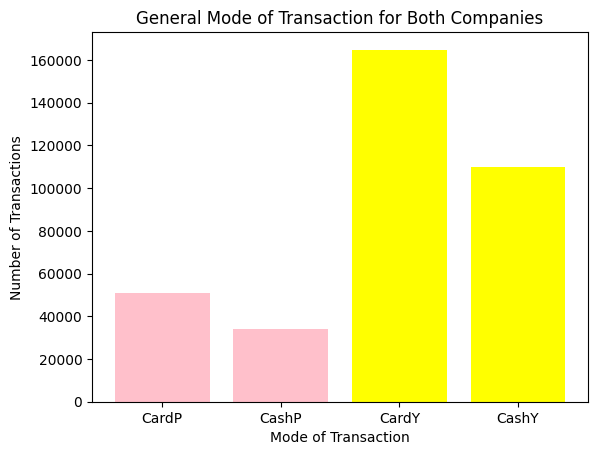

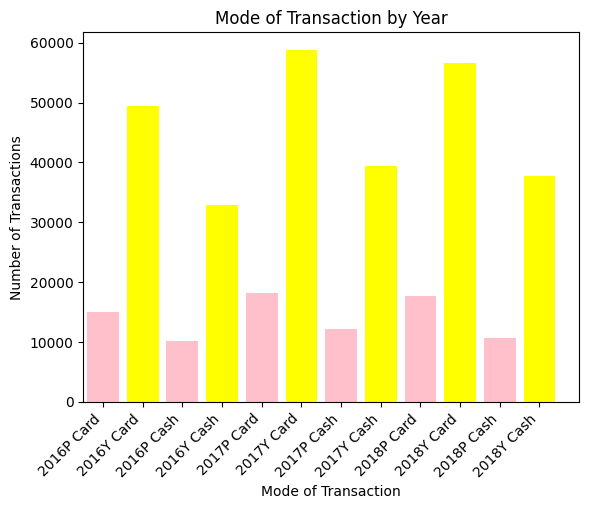

In [257]:
#Payment Type Analysis
#General
Pink_Cab = Pink_Cab_Data['Payment_Mode']
counts = pd.Series(Pink_Cab).value_counts()
print(counts.get('Card'))
Yellow_Cab = Yellow_Cab_Data['Payment_Mode']
counts = pd.Series(Yellow_Cab).value_counts()
print(counts.get('Card'))

#Hypothesis 4: For both companies, customers prefer card over cash as a payment type.
#Explanation: Background knowledge of the growing use of technology and app services that digitally processes orders.

Pink_Card2016 = Pink16['Payment_Mode']
counts=pd.Series(Pink_Card2016).value_counts()
print(counts.get('Card'))
Yellow_Gender2016 = Yellow16['Payment_Mode']
counts=pd.Series(Yellow_Gender2016).value_counts()
print(counts.get('Card'))

Pink_Card2017 = Pink17['Payment_Mode']
counts=pd.Series(Pink_Card2017).value_counts()
print(counts.get('Card'))
Yellow_Gender2017 = Yellow17['Payment_Mode']
counts=pd.Series(Yellow_Gender2017).value_counts()
print(counts.get('Card'))

Pink_Card2018 = Pink18['Payment_Mode']
counts=pd.Series(Pink_Card2018).value_counts()
print(counts.get('Card'))
Yellow_Gender2018 = Yellow18['Payment_Mode']
counts=pd.Series(Yellow_Gender2018).value_counts()
print(counts.get('Card'))

#Vizualization 
x = ["CardP", "CashP", "CardY", "CashY"]
y = [50719, 33992, 164785, 109896]
c = ['pink','pink','yellow','yellow']
plot =plt.bar(x, y, color = c)
plot =plt.title("General Mode of Transaction for Both Companies")
plot =plt.xlabel("Mode of Transaction")
plot =plt.ylabel("Number of Transactions")
plt.show()




x = ["2016P Card", "2016Y Card", "2016P Cash", "2016Y Cash", "2017P Card", "2017Y Card", "2017P Cash", "2017Y Cash", "2018P Card", "2018Y Card", "2018P Cash", "2018Y Cash"]
c = ['pink','yellow','pink','yellow','pink','yellow','pink','yellow','pink','yellow','pink','yellow']
y = [14997, 49342, 10083, 32897, 18124, 58839, 12197, 39350, 17598, 56604, 10712, 37649]
plot =plt.bar(x,y, color = c)
plot =plt.xlim(-0.5,12)
plot =plt.title("Mode of Transaction by Year")
plot =plt.xlabel("Mode of Transaction")
plot =plt.ylabel("Number of Transactions")
plot =plt.xticks(rotation=45, ha='right')
plt.show()


Duplicate Rows :


Company
Pink Cab    27703
Pink Cab    28020
Pink Cab    28020
Pink Cab    27318
Pink Cab    27318
            ...  
Pink Cab    52735
Pink Cab    51564
Pink Cab    53455
Pink Cab    51257
Pink Cab    51510
Name: Customer ID, Length: 52381, dtype: int64

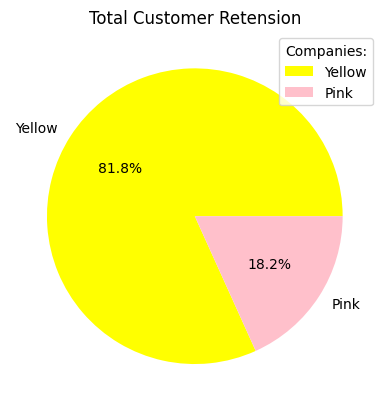

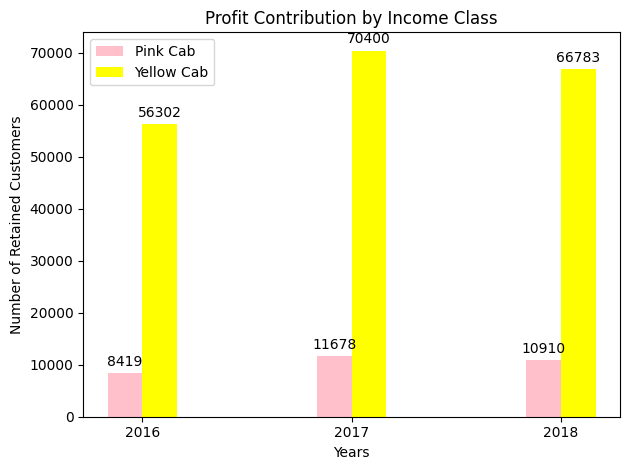

In [265]:
#Customer Retention 
#Hypothesis 5: Yellow Cab will have retained more customers than pink cab overall and yearly. 
#Explanation: Yellow cab charges more per ride and kilo but retains a higher customer base and most likely minimizes more costs at a higher scale than pink cab.

#Defined as the number of customers who have used the samee cab services more than once 
duplicate = Pink_Cab_Data["Customer ID"][Pink_Cab_Data["Customer ID"].duplicated()]
#Total: Yellow: 234,785
#       Pink: 52,381

print("Duplicate Rows :")
duplicate
#Yearly retained customer defined as the number of customers who have used the samee cab services more than once within a year
#      Pink:  Yellow: 
#2016: 8,419  56,302
#2017: 11,678 70,400
#2018: 10,910 66,783

#Vizualizations
import matplotlib.pyplot as plt
y = np.array([234785, 52381])
mylabels = ["Yellow", "Pink"]
c = ['Yellow','Pink']
plot =plt.title("Total Customer Retension")
plot =plt.pie(y, labels = mylabels, colors = c, autopct = '%1.1f%%')
plot =plt.legend()
plot =plt.legend(title = "Companies:")
plt.show() 


figure, axis = plt.subplots()

plot =plt.title("Customer Retention by Year")
plot =plt.xlabel("Years")
plot =plt.ylabel("Number of Retained Customers")

years = [2016,2017,2018]
P= axis.bar(np.arange(len(years))-(1/12),[8419,  11678,  10910], width=1/6, label='Pink Cab', color='pink')
Y= axis.bar(np.arange(len(years))+(1/12),[56302, 70400, 66783], width=1/6, label='Yellow Cab', color='yellow')

plot =axis.set_xticks(np.arange(len(years)), years)
plot =axis.bar_label(P, padding=3)
plot =axis.bar_label(Y, padding=3)


plot =figure.tight_layout()
plot =plt.title("Profit Contribution by Income Class")
plot =plt.legend()
plt.show()
